In [3]:
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

# EX1

In [13]:
messi = cv2.imread("images/messi5.jpg",0)
messi.shape

(342, 548)

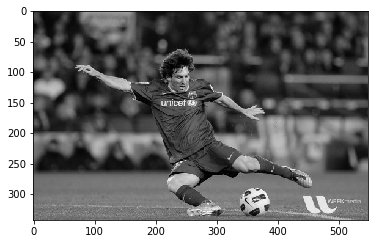

In [15]:
plt.imshow(messi,cmap='gray')
plt.show()

In [20]:
sigma = 0.1
messi_gaussian = coins = np.uint8(255*random_noise(messi,mode='gaussian',var=sigma**2,mean=0))
messi_salt_pepper = coins = np.uint8(255*random_noise(messi,mode='s&p'))

kernel = np.ones((3,3),dtype=np.float32)/9
messi_gaussian_avg = cv2.filter2D(messi_gaussian,-1,kernel)

kernel = np.ones((3,3),dtype=np.float32)/9
messi_salt_pepper_avg = cv2.filter2D(messi_salt_pepper,-1,kernel)

messi_gaussian_mid = cv2.medianBlur(messi_gaussian,3)
messi_salt_pepper_mid = cv2.medianBlur(messi_salt_pepper,3)

messi_gaussian_GB = cv2.GaussianBlur(messi_gaussian,(5,5),0)
messi_salt_pepper_GB = cv2.GaussianBlur(messi_salt_pepper,(5,5),0)

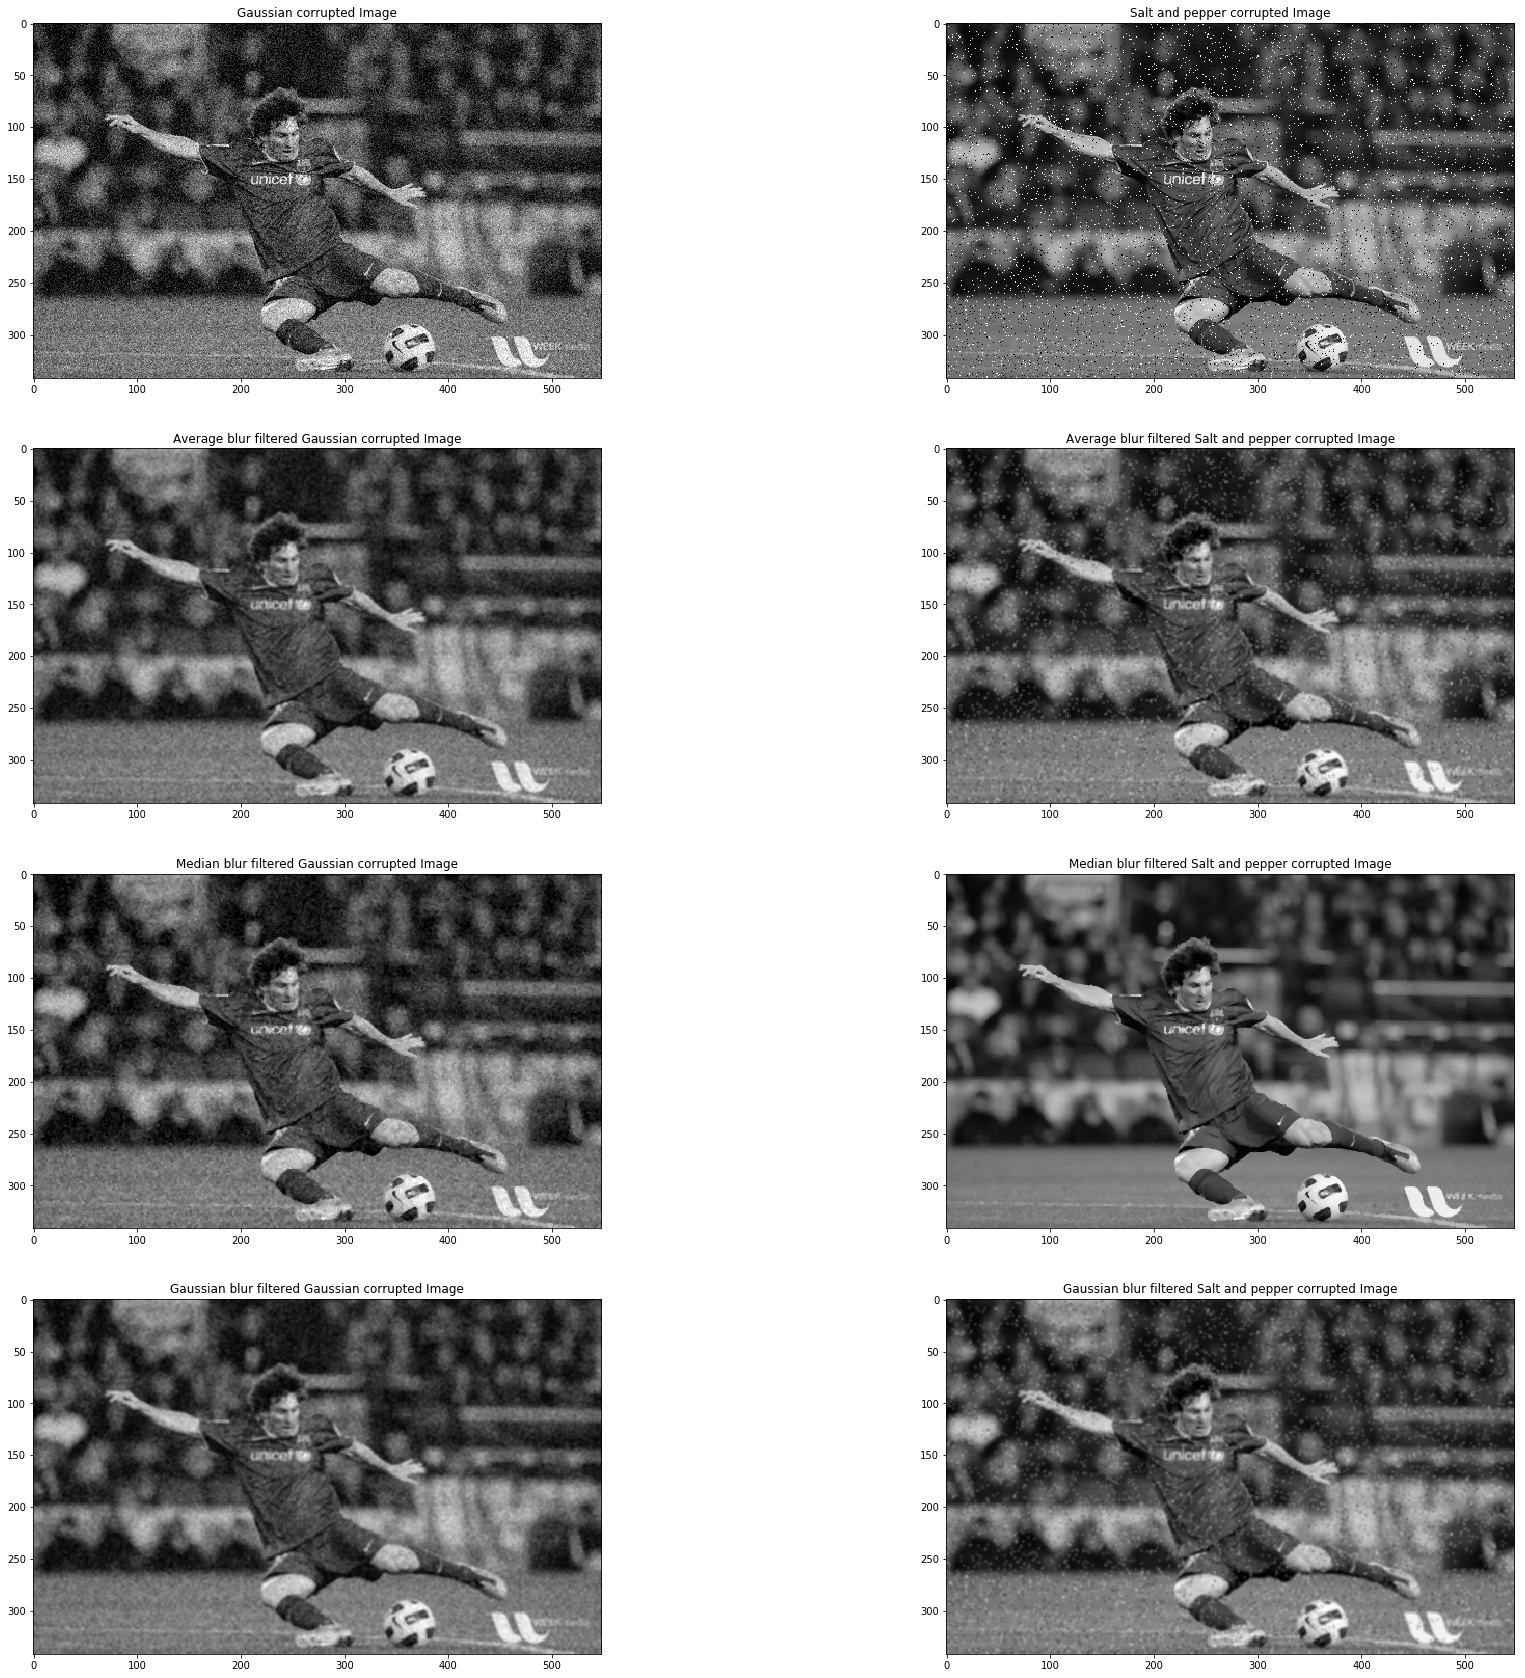

In [35]:
f, subplt = plt.subplots(4,2,figsize=(30,30))

subplt[0,0].imshow(messi_gaussian,cmap='gray')
subplt[0,0].set_title("Gaussian corrupted Image")
subplt[0,1].imshow(messi_salt_pepper,cmap='gray')
subplt[0,1].set_title("Salt and pepper corrupted Image")

subplt[1,0].imshow(messi_gaussian_avg,cmap='gray')
subplt[1,0].set_title("Average blur filtered Gaussian corrupted Image")
subplt[1,1].imshow(messi_salt_pepper_avg,cmap='gray')
subplt[1,1].set_title("Average blur filtered Salt and pepper corrupted Image")

subplt[2,0].imshow(messi_gaussian_mid,cmap='gray')
subplt[2,0].set_title("Median blur filtered Gaussian corrupted Image")
subplt[2,1].imshow(messi_salt_pepper_mid,cmap='gray')
subplt[2,1].set_title("Median blur filtered Salt and pepper corrupted Image")

subplt[3,0].imshow(messi_gaussian_GB,cmap='gray')
subplt[3,0].set_title("Gaussian blur filtered Gaussian corrupted Image")
subplt[3,1].imshow(messi_salt_pepper_GB,cmap='gray')
subplt[3,1].set_title("Gaussian blur filtered Salt and pepper corrupted Image")
plt.show()

# EX2

In [73]:
coines = cv2.imread("images/coines.jpg",0)

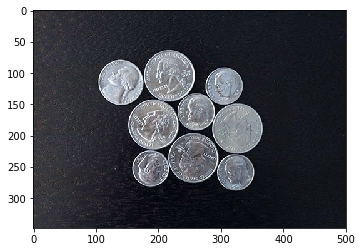

In [74]:
plt.imshow(coines)
plt.show()

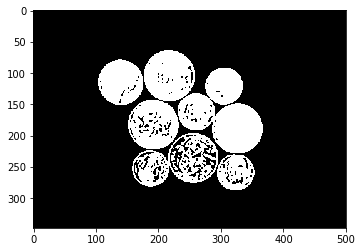

[INFO] 6 unique contours found


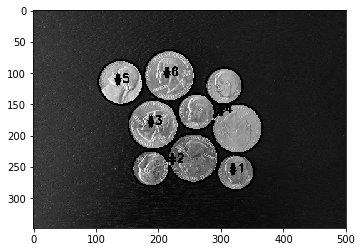

In [153]:
ddepth = cv2.CV_64F
coines_avg = cv2.GaussianBlur(coines,(5,5),0)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
coines_lap = cv2.filter2D(coines_avg, -1, kernel)
coines_med = cv2.medianBlur(coines_lap,3)
ret, coines_thresh = cv2.threshold(coines_med, 150,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# coines_lap = cv2.Laplacian(coines_avg, ddepth, ksize=5)
# coines = cv2.addWeighted(coines,0.7,coines_lap,0.3,0)
plt.imshow(coines_thresh, cmap="gray")
plt.show()

# find contours in the thresholded image
cnts = cv2.findContours(coines_thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
image = coines.copy()
for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
# show the output image
plt.imshow(image, cmap="gray")
plt.show()

# EX3

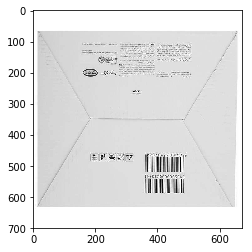

In [111]:
img = cv2.imread("images/goods2.jpg",0)
plt.imshow(img, cmap="gray")
plt.show()

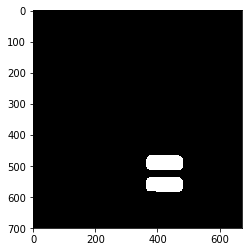

In [139]:
BW_x = cv2.Sobel(img, ddepth, 0, 1,ksize=5)
BW_y = cv2.Sobel(img, ddepth, 1, 0,ksize=5)
gradient = BW_y
gradient = cv2.convertScaleAbs(gradient)
blurred = cv2.blur(gradient, (19, 19))
blurred = cv2.medianBlur(blurred,19)
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap="gray")
plt.show()

# EX4

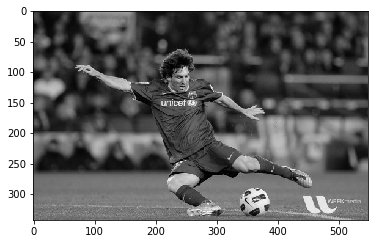

In [4]:
img = cv2.imread("images/messi5.jpg",0)
plt.imshow(img, cmap="gray")
plt.show()

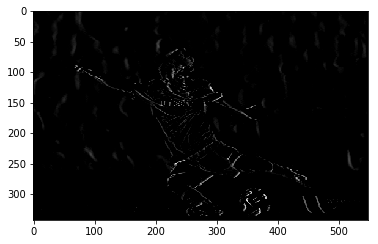

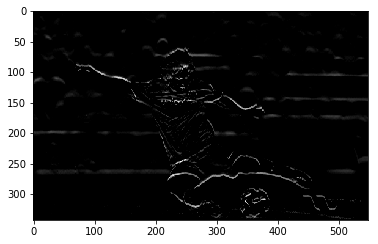

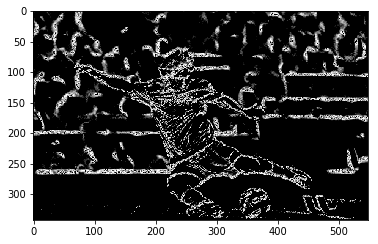

In [30]:
filter1D = np.array([[-0.0052625, -0.0173466, -0.0427401, -0.0768961,
-0.957739, -0.0696751, 0, 0.6696751, 0.0957739,
0.0768961, 0.0427401, 0.0173466, 0.0052625]])
img1 = cv2.filter2D(img, -1, filter1D)
plt.imshow(img1, cmap="gray")
plt.show()
img2 = cv2.filter2D(img, -1, np.transpose(filter1D))
plt.imshow(img2, cmap="gray")
plt.show()
mag = np.sqrt(img1*img1+img2*img2)
mag = np.uint8(mag)
plt.imshow(mag, cmap="gray")
plt.show()